#  ELEC-E5500 Speech Processing -- Autumn 2023  

###  Exercise 4: Speech Enhancement and Evaluations

### Instructions: 

(1) Implement and return files as Exercise_4_yourfirstname.ipynb. Remember to answer the written questions within the file!

(2) Return your answers to MyCourses by 23:59 on Monday, October 2, 2023.

## Introduction
The objective of this exercise is to implement basic speech enhancement techniques, evaluate and visualize the quality of the enhancement. Briefly put, we implement four different filtering methods: Spectral-subtraction, Wiener-filter, linear filter and a VAD based filter.

In all these filters, two things are used: (1) a constant average magnitude noise model and (2) an ideal noise estimate which is the true noise you generate to create the noisy signal. The enhanced signals are evaluated by computing the signal-to-noise ratios- global SNR and segmental SNR. To visualize the results, the segmental SNRs of all enhanced signals are plotted.

Besides this, the spectrograms of the clean, noisy and the three enhanced results are plotted and visually inspected.

## In this exercise, you will be implementing the following functions. They are,

    (1) noiseEst --> Estimate the noise for the noisy signal based on ideal and average noise models.

    (2) spectralSub --> Enhance the noisy signal by spectral subtraction.

    (3) wiener      --> Enhance the noisy signal by Wiener filter.

    (4) linear      --> Enhance the noisy signal by linear filter.

    (5) vadEnhance  --> Enhance the noisy signal by VAD based filter.


    (6) snrGlb --> Compute the global SNR of the enhanced signals.

    (7) snrSeg --> Compute the frame-wise segmental SNR of the enhanced signals.


    Expected plots are provided at the end of the notebook for you to check your code output (i.e., to know the   intended solution).

Some functions are already provided in the note book to reduce the work load.

# Steps in implementation

- Generate a noisy signal, in which the noise is additive white Gaussian noise of power -35dB

- Estimate the noise for the noisy signal, based on 1) ideal estimate 2) avg noise model, by completing "noiseEst". Note that this function should return estimates of the same dimension as the input noise matrix.

- Enhance the noisy signal by implementing the filtering functions 
       1) Spectral subtraction: "spectralSub", 2) Wiener filter: "wiener", 3) Linear filter: "linear", 
       4) VAD based filter: "vadEnhance"

- Compute the global SNR and the frame-wise segmental SNR of the enhanced signals by computing
 1) snrGlb 2) snrSeg
 
- Plot and visualize the results.

## The following cells provide the necessary basic theory for this exercise.

# Noise estimation

## (1) Ideal_noise
Method "ideal_noise" stands for the method wherein the noise estimate is the ideal estimate, i.e., the noise estimate is equal to the true noise. 

Additionally, method "avg_noise_model" is elaborated in the next cell.

## (2) Average noise model estimation
In this exercise, we use a constant average noise model ("avg_noise_model"), which means that as an estimate of noise energy, for each frequency, we use the average noise energy.
Specifically, if $V(f,k)$ is the noise spectrum in frame $k$ for frequency $f$, then the average energy is
\begin{equation}
  |\hat V(f)|^2 = \frac1N \sum_{k=1}^N |V(f,k)|^2.
\end{equation}

# Filtering
To attenuate noise in the signal, we will multiply the signal with weighting factors, which are
calculated for each frequency and each frame. The weighting factors are dependent on both the observed
energy and the noise model.

## (1) Spectral subtraction
Conventional spectral subtraction is defined such that we subtract the estimated noise energy $|\hat V(f)|^2$
from the energy of the observation $|X(f,k)|^2$. We do not have an estimate of the phase, whereby we do not
modify the signal phase. The energy of the estimated clean signal is then
\begin{equation}
  |\hat S(f,k)|^2 =
  \begin{cases}
    |X(f,k)|^2 - |V(f)|^2, &\text{when~} |X(f,k)|^2 > |V(f)|^2\\
    0,&\text{otherwise.}
  \end{cases}
\end{equation}
Above we used a threshold $|X(f,k)|^2 > |V(f)|^2$, because otherwise the estimated signal
energy would be negative. Since negative energy is physically impossible, we put the estimate to
zero always when that would occur.

Furthermore, we want to keep the phase of the original signal, whereby
\begin{equation}
  \angle \hat S(f,k) = \angle X(f,k) = \frac{X(f,k)}{|X(f,k)|}.
\end{equation}
The final estimate is then
\begin{equation}
  \begin{split}
    \hat S(f,k) &= |\hat S(f,k)|\cdot \angle \hat S(f,k) \\
    &=
    \begin{cases}
      X(f,k) \sqrt{\frac{|X(f,k)|^2 - |V(f)|^2}{|X(f,k)|^2}} , &\text{when~} |X(f,k)|^2 > |V(f)|^2\\
    0,&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}

## (2) Wiener filter
Above we found that spectral subtraction can be written in the form $\hat S(f,k) = g(f,k) X(f,k)$,
where $g(f,k)$ is a positive scaling coefficient. We can optimize $g(f,k)$ such that the output
error energy is minimized, whereby we obtain
\begin{equation}
  g(f,k) = \frac{|X(f,k)|^2 - |V(f)|^2}{|X(f,k)|^2}.
\end{equation}
The Wiener estimate is then
\begin{equation}
  \begin{split}
    \hat S(f,k) &= |\hat S(f,k)|\cdot \angle \hat S(f,k) \\
    &=
    \begin{cases}
      X(f,k) \frac{|X(f,k)|^2 - |V(f)|^2}{|X(f,k)|^2} , &\text{when~} |X(f,k)|^2 > |V(f)|^2\\
    0,&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}

## (3) Linear filter
Subtracting energies is a rather heuristic approach, whereby any other heuristic approach could
be potentially just as good. One such heuristic approach is linear subtraction, where we subtract
magnitudes $|V(f)|$ instead of energies $|V(f)|^2$.
The linear estimate is thus
\begin{equation}
  \begin{split}
    \hat S(f,k) &= |\hat S(f,k)|\cdot \angle \hat S(f,k) \\
    &=
    \begin{cases}
      X(f,k) \frac{|X(f,k)| - |V(f)|}{|X(f,k)|} , &\text{when~} |X(f,k)|^2 > |V(f)|^2\\
    0,&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}

## (4) VAD-based filter
The objective is to demonstrate
one of the many possible applications of a VAD. Here, we use the ideal VAD outputs, which you utilized in exercise 3 as the
target outputs, to remove noise from frames. If the target output is 1, it implies that the frame is
predominantly a speech frame, and then we use the Wiener filter to remove noise from such a frame. If the target output
is 0, implying that the frame is mostly a silence frame, we remove all the energy in the frame.
Mathematically, this is represented as:
\begin{equation}
  \begin{split}
    \hat S(f,k) &= |\hat S(f,k)|\cdot \angle \hat S(f,k) \\
    &=
    \begin{cases}
        X(f,k) \frac{|X(f,k)|^2 - |V(f)|^2}{|X(f,k)|^2}, &\text{when~} VAD_{output} == 1\\
    0,&\text{otherwise.}
    \end{cases}
  \end{split}
\end{equation}

# Evaluation metrics

## Signal-to-noise ratio
To quantify the performance of enhancement, we can measure the signal-to-noise-ratio (SNR)
between the clean signal and the estimated signal
\begin{equation}
  {\mathrm{SNR}} = \frac{\| S\|^2}{\|E\|^2} = \frac{\| S\|^2}{\|S - \hat S\|^2}.
\end{equation}
Here $S$, $\hat S$ and $E$ are the clean signal, estimated signal and the estimation error $E=S-\hat S$.
A central choice in the application of SNR-measures is to decide whether to apply them for
the whole signal (global SNR) or window-by-window (segmental SNR).

### (1) Global SNR
To determine the global SNR, we calculate the energy of the original signal $s_n$ and the estimation
error $e_n$, over the whole sound sample.
\begin{equation}
  {\mathrm{SNR_{global}}} = \frac{\sum_{k=1}^N |s_n|^2}{\sum_{k=1}^N |e_n|^2}  = \frac{\sum_{k=1}^N |s_n|^2}{\sum_{k=1}^N |s_n - \hat s_n|^2},
\end{equation}
where $s_n$ and $\hat s_n$ are the the original and estimated time-signals and $N$ is the length of
the whole sound sample.

### (2) Segmental SNR
Though the global SNR is simple to calculate, it does not take into account how humans perceive signal energy
over time. Specifically, a high-energy section of the signal will dominate the whole SNR estimate, such that
errors in low-energy areas are not taken into account properly. Still, for humans, SNR in low-energy areas
can be just as important as the SNR in high-energy areas.

To make sure that we can measure the SNR such that it is independent of the energy in any one frame,
we can first calculate the SNR in each frame and then take the average over all frames. Specifically,
we first calculate the SNR for each frame $k$ as
\begin{equation}
  {\mathrm{SNR}}(k) = \frac{\sum_{f=0}^{F} |S(f,k)|^2}{\sum_{f=0}^F |E(f,k)|^2}  = \frac{\sum_{f=0}^{F} |S(f,k)|^2}{\sum_{f=0}^F |S(f,k)-\hat S(f,k)|^2} ,
\end{equation}
where $S(f,k)$ and $\hat S(f,k)$ are the spectra of the clean and estimated signals and $F$ is the number of
frequency components.

In this exercises, you should thus plot ${\mathrm{SNR}}(k)$ over all $k$.

Usually, we would also calculate the mean of the frame-wise or segmental SNR as
\begin{equation}
  {\mathrm{SNR_{segmental}}} = \frac1K \sum_{k=1}^K {\mathrm{SNR}}(k),
\end{equation}
where $K$ is the number of frames.

## Import all the required packages

In [ ]:
import scipy.io.wavfile as wav
import scipy.signal as sig
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd
from scipy.io import wavfile
import matplotlib.pyplot as plt
import sounddevice as sd

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Let's start Excercise 4

In [ ]:
# Read the audio file and sampling rate
Fs_target = 16000
Fs,data_clean = wav.read('Exercise4.wav')

# Transform signal from int16 (-32768 to 32767) to float32 (-1,1)
if type(data_clean[0]) == np.int16:
    data_clean = np.divide(data_clean,32768,dtype=np.float32)

# Make sure the sampling rate is 16kHz
if not (Fs == Fs_target):
    data_clean = sig.resample_poly(data_clean,Fs_target,Fs)
    Fs = Fs_target

In [ ]:
# Split the data sequence into windows.
frame_length_ms = 25 # in miliseconds
hop_length_ms = 12.5 # in miliseconds

frame_length = int(np.around((frame_length_ms/1000)*Fs))# 25ms in samples
hop_size = int(np.around((hop_length_ms/1000)*Fs))# 12.5 ms (25/2 ms) in samples (50% overlap)
window_types = ('rect','hann','cosine','hamming')# window types

# Windowing of speech

In [ ]:
# Split the data sequence into windows.

def windowing(data, frame_length, hop_size, windowing_function):
    data = np.array(data)
    number_of_frames = 1 + int(np.floor((len(data)-frame_length)/hop_size))
    frame_matrix = np.zeros((frame_length,number_of_frames))

    if windowing_function == 'rect':
        window = np.ones((frame_length),1)
    elif windowing_function == 'hann':
        window = np.hanning(frame_length)
    elif windowing_function == 'cosine':
        window = np.sqrt(np.hanning(frame_length))
    elif windowing_function == 'hamming':
        window = np.hamming(frame_length)
    else:
        os.error('Windowing function not supported')

        
    for i in range(number_of_frames):
        start = i*hop_size
        stop = np.minimum(start+frame_length,len(data))

        frame = np.zeros(frame_length)

        frame[0:stop-start] = data[start:stop]
        frame_matrix[:,i] = np.multiply(window,frame)
    return frame_matrix

In [ ]:
win_idx = 3
frame_matrix_clean = windowing(data_clean, frame_length, hop_size, window_types[win_idx])# Windowing

In [ ]:
frame_matrix_clean.shape

# Provided functions

In [ ]:
def WGN(data_len, snr):
    #Add white gaussian noise to the signal with the defined snr.

    noise = np.random.normal(0,1,data_len)
    pow_ratio = np.power(10,(snr/20))
    noise_red = noise*pow_ratio

    return noise_red

In [ ]:
def read_targets():
    #Target files must be in the same directory
    with open('output_targets','r') as f:
        data = f.read()
    
    targets = np.array([int(i) for i in data.split()])
    targets = targets.reshape((1,len(targets)))
    return targets

In [ ]:
def getWindow(frame_length,windowing_type):
    if (windowing_type == 'rect'):
        window = np.ones(frame_length)
    elif (windowing_type == 'hann'):
        window = np.hanning(frame_length)
    elif (windowing_type == 'cosine'):
        window = np.sqrt(np.hanning(frame_length))
    elif (windowing_type == 'hamming'):
        window = np.hamming(frame_length)
    else:
        print('Windowing function not supported')
        exit()
    return window.reshape(-1,1)

# Complete these functions

In [ ]:
# Generate a noisy signal


# Generate white Gaussian noise of strength -35dB 
data_noise = None
# Generate the noisy signal, where the noise is additive white Guassian
data_noisy = None

In [ ]:
plt.plot(data_noise)

In [ ]:
plt.plot(data_noisy)

### Noise estimation

In [ ]:
def noiseEst(data_matrix,est_type):
    # If estimation type is ideal noise, return back the true noise value. 
    # If estimation type is avg_noise_model, get the average noise model by computing the mean of the noise type. 
    # The dimesions of 'noise_estimation' should be same as the dimensions of the input data_matrix
    if (est_type == 'avg_noise_model'):
        noise_mat = None
        noise_freq = None
        #Get the average-noise model
        avg_noise = None
        # Return model of the same dimensions as input noise matrix
        noise_estimation = None
    elif (est_type == 'ideal_noise'):
        #Get the ideal noise
        noise_mat = None
        noise_freq = None
        noise_estimation = None
    else:
        print('Wrong noise type')
        exit()
    
    return noise_estimation

### Spectral subtraction

In [ ]:
def spectralSub(frame_matrix, hop_size, window_type, noise_est, original_signal_length):
    """
    Return the enhacned signal after spectral subtraction
    """

    #Setting initial variables
    frame_length = len(frame_matrix)
    fftlen = int(np.around(frame_length/2)+1)
    hwin = getWindow(frame_length,window_type)
    xest = np.zeros((original_signal_length,1))

    #Performging enhancement for each frame

    for win_idx in range(len(frame_matrix[0])):
        start = int(win_idx*hop_size)
        stop = int(np.minimum(start+frame_length,original_signal_length))
        
        #Applying FFT and leaving out the symmetrical second half (or use numpy rfft)
        Y_freq = None
        #Applyin filtering - Spectral Subtraction
        SpecSub_filt = None
        X_freq_est = None
        #Reconstruction and inverse-FFT
        xwinest = None
        #Overlap-add to get back the entire signal
        xest[start:stop] = None

    return xest

### Wiener filtering

In [ ]:
def wiener(frame_matrix, hop_size, window_type, noise_est, original_signal_length):
    """
    Return the enhacned signal after Wiener filtering
    """

    #Setting initial variables
    frame_length = len(frame_matrix)
    fftlen = int(np.around(frame_length/2)+1)
    hwin = getWindow(frame_length,window_type)
    xest = np.zeros((original_signal_length,1))

    #Performging enhancement for each frame

    for win_idx in range(len(frame_matrix[0])):
        start = int(win_idx*hop_size)
        stop = int(np.minimum(start+frame_length,original_signal_length))
        #Applying FFT and leaving out the symmetrical second half (or use numpy rfft)
        Y_freq = None
        #Applyin filtering - Spectral Subtraction
        Wiener_filt = None
        X_freq_est = None
        #Reconstruction and inverse-FFT
        xwinest = None
        #Overlap-add to get back the entire signal
        xest[start:stop] = None
    return xest

### Linear filtering

In [ ]:
def linear(frame_matrix, hop_size, window_type, noise_est, original_signal_length):
    """
    Return the enhacned signal after linear filtering
    """

    #Setting initial variables
    frame_length = len(frame_matrix)
    fftlen = int(np.around(frame_length/2)+1)
    hwin = getWindow(frame_length,window_type)
    xest = np.zeros((original_signal_length,1))

    #Performging enhancement for each frame

    for win_idx in range(len(frame_matrix[0])):
        start = int(win_idx*hop_size)
        stop = int(np.minimum(start+frame_length,original_signal_length))
        #Applying FFT and leaving out the symmetrical second half (or use numpy rfft)
        Y_freq = None
        #Applyin filtering - Spectral Subtraction
        Linear_filt = None
        X_freq_est = None
        #Reconstruction and inverse-FFT
        xwinest = None
        #Overlap-add to get back the entire signal
        xest[start:stop] = None

    return xest

### VAD-based filter

In [ ]:
def vadEnhance(frame_matrix, hop_size, window_type, noise_est, original_signal_length, vad_target):
    """
    Return the enhacned signal after Wiener filtering with VAD trigger
    """

    #Setting initial variables
    frame_length = len(frame_matrix)
    fftlen = int(np.around(frame_length/2)+1)
    hwin = getWindow(frame_length,window_type)
    xest = np.zeros((original_signal_length,1))

    #Performging enhancement for each frame

    for win_idx in range(len(frame_matrix[0])):
        start = int(win_idx*hop_size)
        stop = int(np.minimum(start+frame_length,original_signal_length))
        #Applying FFT and leaving out the symmetrical second half (or use numpy rfft)
        Y_freq = None
        #Applyin filtering - Spectral Subtraction
        if vad_target[win_idx]:
            VAD_filt = None
        else:
            VAD_filt = None
        
        X_freq_est = None
        #Reconstruction and inverse-FFT
        xwinest = None
        #Overlap-add to get back the entire signal
        xest[start:stop] = None

    return xest

### Global SNR

In [ ]:
def snrGlb(clean, enhanced):
    if not (len(clean) == len(enhanced)):
        print('Length of signals do not match')
        exit()
    
    #Compute the global SNR in dB
    global_snr = None

    return global_snr

### Segmental-SNR

In [ ]:
def snrSeg(clean,enhanced):
    if not (len(clean) == len(enhanced)):
        print('Length of signals do not match')
        exit()
    
    #Compute the segmental-SNR in dB
    noise = None
    segmental_snr = None

    return segmental_snr

## Estimate noise model

In [ ]:
win_idx = 3
frame_matrix = windowing(data_noisy, frame_length, hop_size, window_types[win_idx])# Windowing for noisy speech

In [ ]:
estimation_types = ('ideal_noise', 'avg_noise_model')
est_type = 0

# Window the generated white Gaussian noise signal/s for modelling: 
frame_matrix_noise = windowing(data_noise, frame_length, hop_size, window_types[win_idx])

# Obtain the noise model which will be used later for noise reduction
noise_est = noiseEst(frame_matrix_noise, estimation_types[est_type])

## Enhancement

In [ ]:
# Perform spectral subtraction
enhanced_sig_specSub = spectralSub(frame_matrix, hop_size, window_types[win_idx], noise_est, len(data_noisy))

# Perform Wiener filtering
enhanced_sig_wiener = wiener(frame_matrix, hop_size, window_types[win_idx], noise_est, len(data_noisy))

# Perform linear filtering
enhanced_sig_linear = linear(frame_matrix, hop_size, window_types[win_idx], noise_est, len(data_noisy))

# VAD based noise-reduction
output_targets = read_targets().reshape(-1,1)
enhanced_sig_vad = vadEnhance(frame_matrix, hop_size, window_types[win_idx], noise_est, len(data_noisy), output_targets)

## Evaluation

In [ ]:
# Compute the global SNR in dB for all the enhanced signals using spectral subtraction, Wiener filtering, linear filtering
SNR_global_noisy = snrGlb(data_clean, data_noisy)
SNR_global_ss = snrGlb(data_clean, enhanced_sig_specSub)
SNR_global_wie = snrGlb(data_clean, enhanced_sig_wiener)
SNR_global_linear = snrGlb(data_clean, enhanced_sig_linear)
SNR_global_vad = snrGlb(data_clean, enhanced_sig_vad)


# Segmental-SNR

# First, Window the clean and enhanced signals 
frame_matrix_clean = windowing(data_clean, frame_length, hop_size, window_types[win_idx])
frame_matrix_enhSS = windowing(enhanced_sig_specSub.reshape((-1,)), frame_length, hop_size, window_types[win_idx])
frame_matrix_enhWie = windowing(enhanced_sig_wiener.reshape((-1,)), frame_length, hop_size, window_types[win_idx])
frame_matrix_enhLin = windowing(enhanced_sig_linear.reshape((-1,)), frame_length, hop_size, window_types[win_idx])
frame_matrix_enhvad = windowing(enhanced_sig_vad.reshape((-1,)), frame_length, hop_size, window_types[win_idx])

# Then compute the segmental SNR
SNR_seg_noisy = snrSeg(frame_matrix_clean, frame_matrix)
SNR_seg_ss = snrSeg(frame_matrix_clean, frame_matrix_enhSS)
SNR_seg_wie = snrSeg(frame_matrix_clean, frame_matrix_enhWie)
SNR_seg_linear = snrSeg(frame_matrix_clean, frame_matrix_enhLin)
SNR_seg_vad = snrSeg(frame_matrix_clean, frame_matrix_enhvad)

# Visualizations

In [ ]:
## Plotting and visualization
plt.figure()
fig, axes = plt.subplots(figsize=(12, 6))
fig.tight_layout()
#Plot the noisy signal and the segmental SNRs from the 4 methods. Let the x-axis denote frames and y-axis denote the SNR in dB

plt.legend(('noisy', 'spectral subtraction', 'Wiener', 'Linear', 'vad'))
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show(block=False)

In [ ]:
# Plot the spectrograms of the clean, noisy and the enhanced signals
# In this figure, plot the clean and noisy spectrograms
plt.figure()
fig, axes = plt.subplots(figsize=(12, 12))
fig.tight_layout()

eps = 0.000001 #Add before log10 to avoid zeros
Nfft = 1024
f_axis = np.array(range(int((Nfft/2)+1)))/(Nfft/2)*Fs/2
plt.subplot(2,1,1)

plt.title('Spectrogram-Clean')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')

plt.subplot(2,1,2)

plt.title('Spectrogram-Noisy')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show(block=False)

In [ ]:
#In this figure, plot the spectrograms of all the 4 enhanced signals
plt.figure()
fig, axes = plt.subplots(figsize=(12, 12))
fig.tight_layout()
#Plot the enhanced signal with spectral subtraction
plt.subplot(2,2,1)

plt.title('Spectrogram-Spectral Subtraction')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')
#Plot the enhanced signal with Wiener filter
plt.subplot(2,2,2)

plt.title('Spectrogram-Wiener filter')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')
#Plot the enhanced signal with linear method
plt.subplot(2,2,3)

plt.title('Spectrogram-Linear')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')
#Plot the enhanced signal with VAD method
plt.subplot(2,2,4)

plt.title('Spectrogram-VAD')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Frame number')

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show(block=False)

# Write your observations here

## What did you learn from this exercise?












#  Question to learn more (optional)

Record your own speech file and then run this notebook for your speech file. Write your observations. For doing VAD based noise-reduction, you need to create a ground truth VAD (i.e., output_targets).

## Expected Result (example)

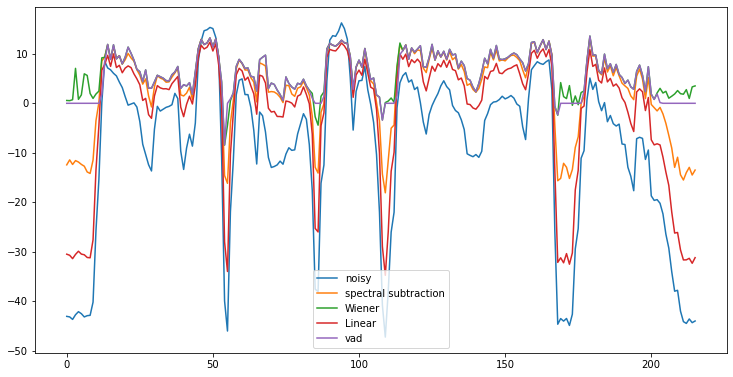

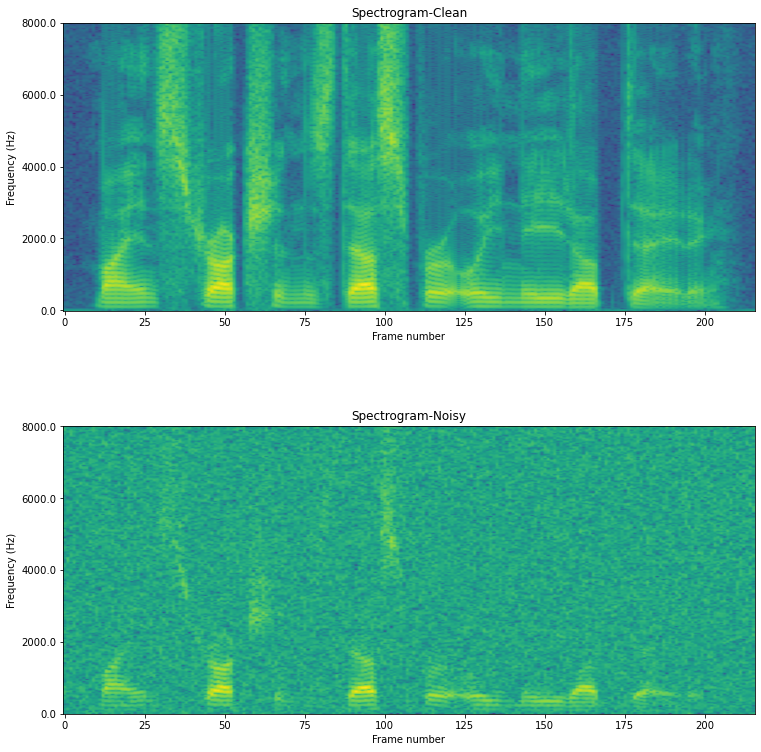

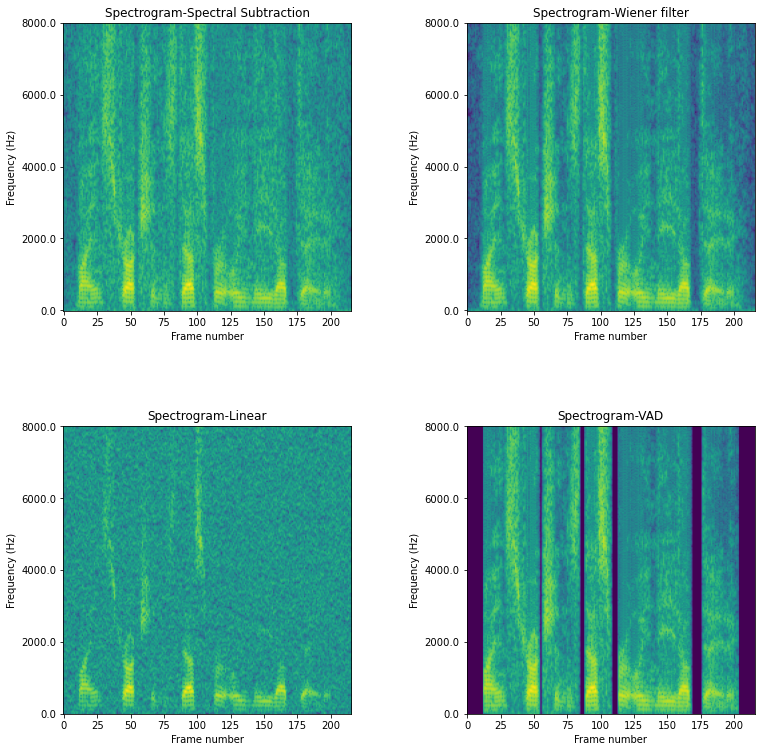